In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Tải 2 file greenparkingchar.zip và greenparking2char.zip về thư mục data
# Không chạy lại cell này
!wget -P /content/drive/MyDrive/NhanDienBienSoXeMay/data https://github.com/thigiacmaytinh/DataThiGiacMayTinh/blob/main/greenparkingchar.zip
!wget -P /content/drive/MyDrive/NhanDienBienSoXeMay/data https://github.com/thigiacmaytinh/DataThiGiacMayTinh/blob/main/greenparking2char.zip

In [ ]:
%cd /content/drive/MyDrive/NhanDienBienSoXeMay/data/GreenParking/labels

/content/drive/MyDrive/NhanDienBienSoXeMay/data/GreenParking/labels


In [ ]:
with open("location.txt", "r") as f:
  datas = f.readlines()

In [ ]:
print(datas)
cp_datas = datas.copy()
cp_datas[-1] + "\n"
print(cp_datas)

['0000_00532_b.jpg 1 145 73 72 62\n', '0000_02187_b.jpg 1 175 116 83 78\n', '0000_05696_b.jpg 1 190 23 83 71\n', '0000_06886_b.jpg 1 154 79 85 76\n', '0000_08244_b.jpg 1 181 75 79 70\n', '0001_05318_b.jpg 1 174 52 71 61\n', '0002_02183_b.jpg 1 212 158 70 53\n', '0002_02554_b.jpg 1 204 145 88 79\n', '0003_02063_b.jpg 1 154 132 82 66\n', '0003_07398_b.jpg 1 206 198 75 61\n', '0004_06801_b.jpg 1 132 215 80 64\n', '0005_00490_b.jpg 1 152 38 78 66\n', '0005_00512_b.jpg 1 205 155 78 63\n', '0005_02171_b.jpg 1 154 113 78 63\n', '0006_05286_b.jpg 1 190 145 86 77\n', '0006_06035_b.jpg 1 203 129 81 71\n', '0006_06797_b.jpg 1 213 82 72 65\n', '0007_02188_b.jpg 1 235 153 91 81\n', '0007_05159_b.jpg 1 187 161 83 71\n', '0009_00490_b.jpg 1 208 103 80 66\n', '0009_02194_b.jpg 1 146 137 86 73\n', '0009_05325_b.jpg 1 178 86 79 61\n', '0010_00004_b.jpg 1 196 139 78 66\n', '0010_02063_b.jpg 1 144 130 79 64\n', '0011_00515_b.jpg 1 184 102 79 65\n', '0012_04539_b.jpg 1 196 121 75 62\n', '0013_05647_b.jpg 1

In [ ]:
count = 0;
for data in cp_datas:
  count += 1
  name = data[:data.index("g") - 2] + "txt"
  content = data[data.index("g") + 2 : -1]
  if count == 1748:
    content = data[data.index("g") + 2 : ]

  with open(name, "a") as f:
    f.write(content) 

print(count)

1748


In [ ]:
from PIL import Image, ImageTk
import matplotlib.pyplot as plt
import numpy as np

%cd /content/drive/MyDrive/NhanDienBienSoXeMay/data/GreenParking/images
src_img = "0000_00532_b.jpg"
img = Image.open(src_img).convert('L')

/content/drive/MyDrive/NhanDienBienSoXeMay/data/GreenParking/images


/content/drive/MyDrive/NhanDienBienSoXeMay/data/GreenParking/images


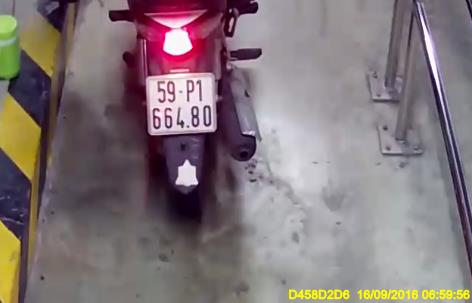

error: ignored

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
%cd /content/drive/MyDrive/NhanDienBienSoXeMay/data/GreenParking/images
src = "0000_00532_b.jpg"

img = cv2.imread(src)
img_crop = img[62:145, 145:145]
cv2_imshow(img)
cv2_imshow(img_crop)

In [1]:
txt_path = "/content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7/runs/detect/exp6/labels/test1.txt"
with open(txt_path, "r") as f:
  datas = f.readlines()

In [2]:
infor = datas[0][2:-1]
print(datas)
print(infor)
print(type(infor))

['0 0.475817 0.547304 0.379085 0.226961\n']
0.475817 0.547304 0.379085 0.226961
<class 'str'>


In [3]:
import numpy as np

list_loc = np.array(infor.split(" "), dtype=np.float32)
print(list_loc)

[0.475817 0.547304 0.379085 0.226961]


In [4]:
list_loc.reshape(1,4)

array([[0.475817, 0.547304, 0.379085, 0.226961]], dtype=float32)

In [5]:
import cv2
from google.colab.patches import cv2_imshow

In [6]:
img_path = "/content/drive/MyDrive/NhanDienBienSoXeMay/data/PersonalTest/test1.jpg"
img = cv2.imread(img_path)
cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

In [7]:
h, w, d = img.shape
# h = 640
# w = 640
padw = 0
padh = 0

In [8]:
from numpy.core.memmap import dtype
x = np.copy(list_loc)
y = np.array(x, dtype="int")
y[0] = round(w * (x[0] - x[2] / 2) + padw)  # top left x
y[1] = round(h * (x[1] - x[3] / 2) + padh)  # top left y
y[2] = round(w * (x[0] + x[2] / 2) + padw)  # bottom right x
y[3] = round(h * (x[1] + x[3] / 2) + padh)  # bottom right y

In [ ]:
print(y)


[ 438  885 1018 1348]


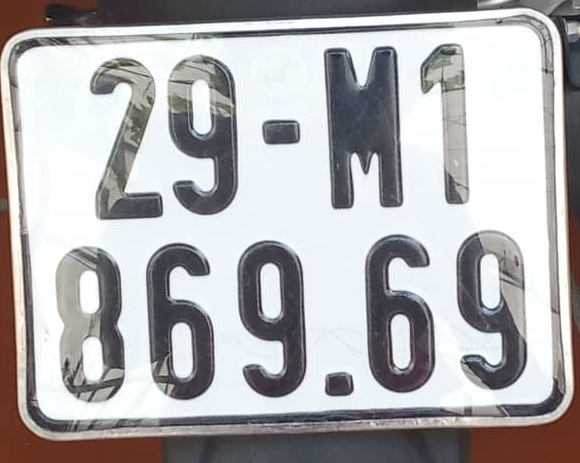

In [9]:
size = (w,h)
resize_img = cv2.resize(img, size)
crop_img = resize_img[y[1]:y[3], y[0]:y[2]]
cv2_imshow(crop_img)

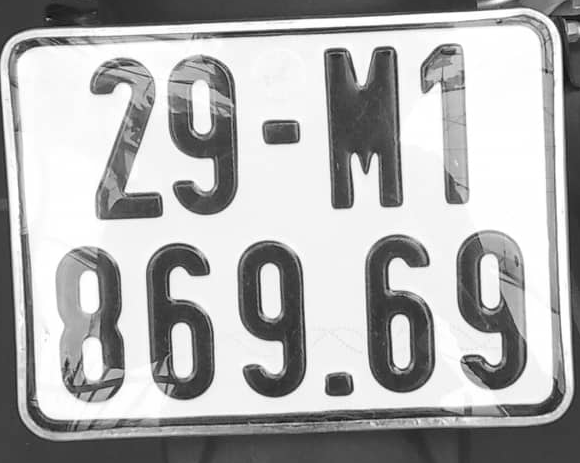

In [ ]:
gray = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

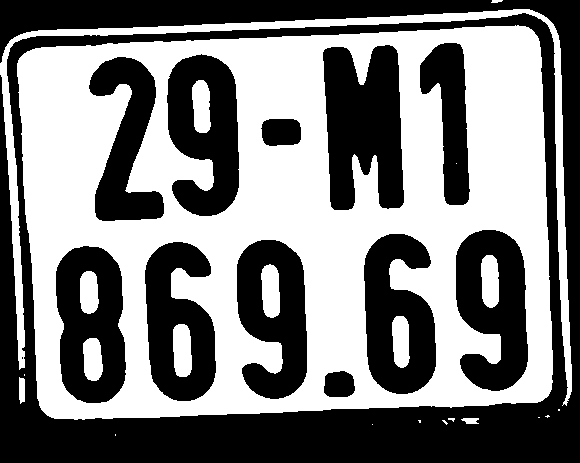

In [ ]:
blur = cv2.GaussianBlur(gray, ksize=(3,3), sigmaX=cv2.BORDER_DEFAULT)
ret, thres = cv2.threshold(blur, 210, 255, cv2.THRESH_BINARY)
cv2_imshow(thres)


In [ ]:
contours, hierarchies = cv2.findContours(thres, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

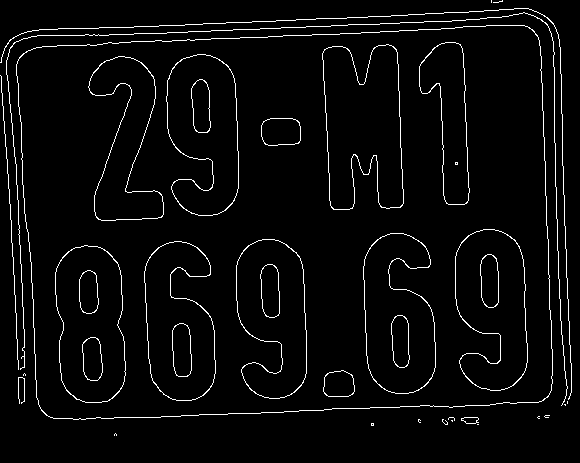

In [ ]:
canny = cv2.Canny(thres, ret, 255)
cv2_imshow(canny)

In [ ]:
print(max(contours[-2][0][0]))

513


In [ ]:
for ct in contours:
  # cv2_imshow(thres[min(ct[:][1]):max(ct[:][1]), min(ct[:][0]):max(ct[:][0])])
  # print( min(ct[:][1]), max(ct[:][1]), min(ct[:][0]), max(ct[:][0]) )
  print("new", ct, sep="\n")

In [ ]:
print(max(contours[-1][:][:][:][0]))

[492   0]


In [ ]:
sample = []
for ct in contours:
  # cv2_imshow(thres[min(ct[:][1]):max(ct[:][1]), min(ct[:][0]):max(ct[:][0])])
  # print( min(ct[:][1]), max(ct[:][1]), min(ct[:][0]), max(ct[:][0]) )
  min_x, min_y, max_x, max_y = thres.shape[1], thres.shape[0], 0, 0
  for point in ct:
    min_x = min(min_x, point[0][0])
    min_y = min(min_y, point[0][1])
    max_x = max(max_x, point[0][0])
    max_y = max(max_y, point[0][1])
  # print(min_x, min_y, max_x, max_y)
  acspect = ((max_x - min_x) * (max_y - min_y)) / (thres.shape[1] * thres.shape[0])
  if acspect >= 0.025 and acspect <= 0.075:
    area = cv2.resize(thres[min_y:max_y, min_x:max_x],(30,60), interpolation=cv2.INTER_AREA)
    exchange_range = cv2.bitwise_not(area)
    # cv2_imshow(exchange_range)
    sample.append(exchange_range)
  # print(min_x, min_y, max_x, max_y)
    # print(point[0])

In [ ]:
from keras.models import load_model

model = load_model("/content/drive/MyDrive/NhanDienBienSoXeMay/code/DigitalClassificationModel/15_epochs_model.h5")

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 60, 30, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 58, 28, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 29, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 29, 14, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 14, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 27, 12, 64)        36928     
                                                      

In [ ]:
sample = np.array(sample, "float")
sample = sample.reshape(sample.shape[0], sample.shape[1], sample.shape[2], 1) / 255

In [ ]:
result = model.predict(sample)

1/1 [==============================] - 0s 141ms/step


In [ ]:
labels_dict = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '65': 10, '66': 11, '67': 12, '68': 13, '69': 14, '70': 15, '71': 16, '72': 17, '75': 18, '76': 19, '77': 20, '78': 21, '80': 22, '82': 23, '83': 24, '84': 25, '85': 26, '86': 27, '88': 28, '89': 29, '90': 30}

In [ ]:
label_dict_ex = {}
for key in labels_dict:
  if labels_dict[key] < 10:
    label_dict_ex[labels_dict[key]] = key
  else:
    label_dict_ex[labels_dict[key]] = chr(int(key))

In [ ]:
print(label_dict_ex)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'K', 19: 'L', 20: 'M', 21: 'N', 22: 'P', 23: 'R', 24: 'S', 25: 'T', 26: 'U', 27: 'V', 28: 'X', 29: 'Y', 30: 'Z'}


In [ ]:
label_dict_ex = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'K', 19: 'L', 20: 'M', 21: 'N', 22: 'P', 23: 'R', 24: 'S', 25: 'T', 26: 'U', 27: 'V', 28: 'X', 29: 'Y', 30: 'Z'}

In [ ]:
for element in result:
  list_element = list(element)
  # print(list_element.index(max(list_element)))
  print(max(list_element)/1)
  print(label_dict_ex[list_element.index(max(list_element))])

In [ ]:
for element in result:
  list_element = list(element)
  print(list_element[20]/1)
  

In [ ]:
for element in result:
  print(label_dict_ex[np.argmax(element)], element[np.argmax(element)]*100)

8 67.5943672657013
6 97.66041040420532
9 99.29941296577454
6 96.37665748596191
9 98.14874529838562
2 79.55108880996704
9 98.80082607269287
N 53.11366319656372
1 99.50044751167297


**Thử nghiệm data**

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
path = "/content/drive/MyDrive/NhanDienBienSoXeMay/data/charTrainset/0/46304_5.jpg"

img = cv.imread(path, -1)
cv2_imshow(img)

In [ ]:
print(img.shape)

(28, 12, 3)


In [ ]:
dict1 = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8,
         '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16,
         'H': 17, 'K': 18, 'L': 19, 'M': 20, 'N': 21, 'P': 22, 'R': 23, 'S': 24,
         'T': 25, 'U': 26, 'V': 27, 'X': 28, 'Y': 29, 'Z': 30}

In [ ]:
id = "T"
print(dict1[id])

25


**Xử lý ảnh**

khử nhiễu

khử bóng, sáng

tăng tương phản


Ý tưởng

chuyển xám -> Blur -> tăng tương phản, sắc nét.

chuyển hsv -> lọc sáng -> chuyển xám. 

In [ ]:
from skimage.filters import threshold_local
from skimage import measure

In [ ]:
# apply thresh to extracted licences plate
V = cv2.split(cv2.cvtColor(crop_img, cv2.COLOR_BGR2HSV))[2]

# adaptive threshold
T = threshold_local(V, 15, offset=10, method="gaussian")
thresh = (V > T).astype("uint8") * 255

# convert black pixel of digits to white pixel
thresh = cv2.bitwise_not(thresh)

thresh = cv2.medianBlur(thresh, 5)

# connected components analysis
labels = measure.label(thresh, connectivity=2, background=0)

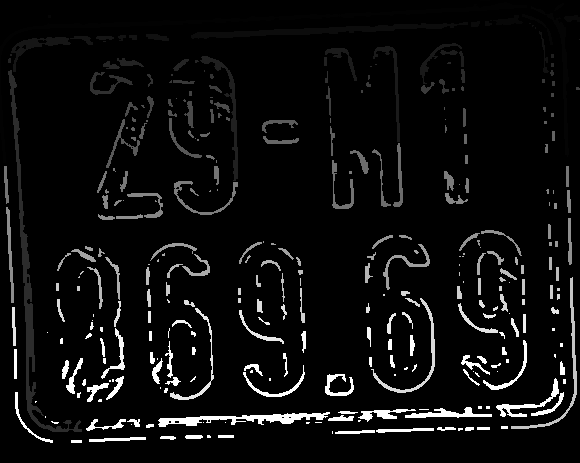

In [ ]:
cv2_imshow(labels)

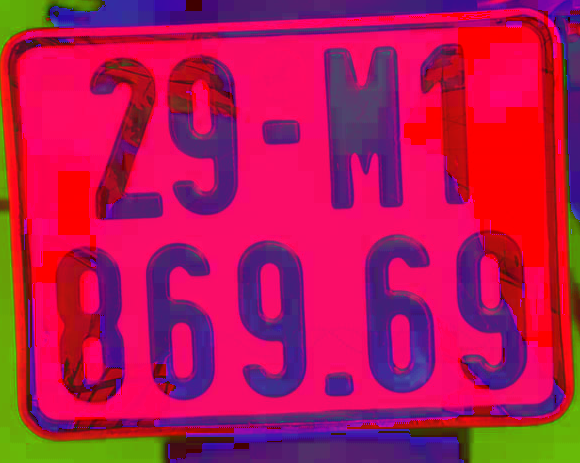

In [ ]:
hsv = cv2.cvtColor(crop_img, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv)

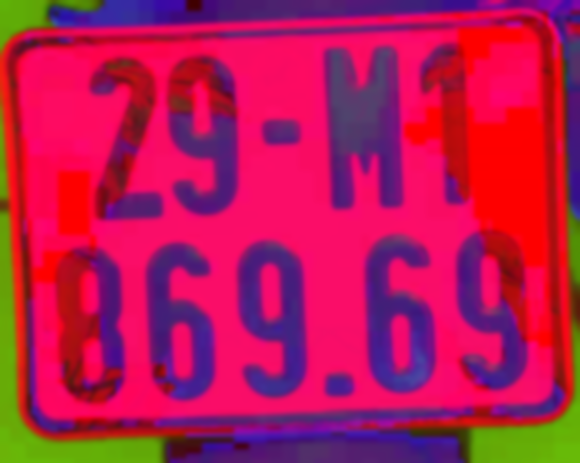

In [ ]:
smooth = cv2.GaussianBlur(hsv, (13,13), 0)
cv2_imshow(smooth)

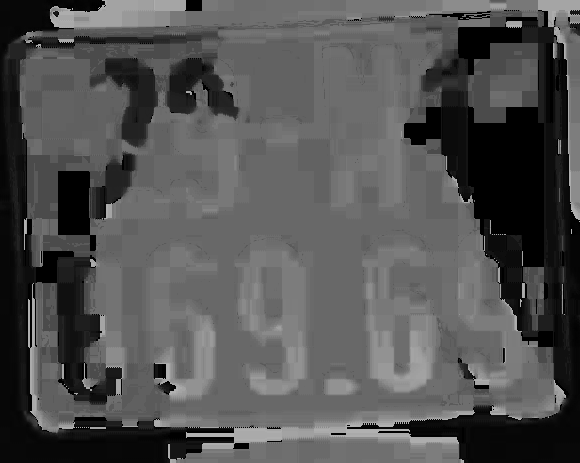

In [ ]:
cv2_imshow(cv2.split(hsv)[0])

In [ ]:
def minus_value(img, value):

  h, s, v = cv2.split(img)

  v[:,:] = v[:,:] - value

  new_img = cv2.merge((h,s,v))

  cv2_imshow(new_img)
  cv2_imshow(cv2.cvtColor(new_img, cv2.COLOR_HSV2RGB))

In [ ]:
def minus_value2(img, channal : int, value : int):

  img[channal][:,:] = img[channal][:,:] - value

  cv2_imshow(img)
  cv2_imshow(cv2.cvtColor(img, cv2.COLOR_HSV2BGR))

In [ ]:
def full_S_and_avg_V(img):
  
  img[1][:,:] = np.max(img[1][:,:])
  # img[2][:,:] = int(np.average(img[2][:,:]))
  img[2][:,:] = 0
  cv2_imshow(img)
  cv2_imshow(cv2.cvtColor(img, cv2.COLOR_HSV2BGR))

In [ ]:
minus_value2(hsv, 2, 100)

In [ ]:
full_S_and_avg_V(hsv)

**Cái gì đó 1**

In [14]:
def sketch(img):

  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  cv2_imshow(gray_img)

  invert_img = cv2.bitwise_not(gray_img)
  cv2_imshow(invert_img)

  blur = cv2.GaussianBlur(invert_img, (21,21), 0)
  cv2_imshow(blur)

  invert_blur = cv2.bitwise_not(blur)
  cv2_imshow(invert_blur)

  div = cv2.divide(gray_img, invert_blur, scale=256.0)
  cv2_imshow(div)

In [ ]:
sketch(crop_img)

In [16]:
def change_brightness(img, alpha, beta):
    img_new = np.asarray(alpha*img + beta, dtype=int)   # cast pixel values to int
    img_new[img_new>255] = 255
    img_new[img_new<0] = 0
    return img_new

In [20]:
def convert_to_binary(img_grayscale):
    # adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C or cv2.ADAPTIVE_THRESH_GAUSSIAN_C
    img_binary = cv2.adaptiveThreshold(img_grayscale, 
                                       maxValue=255, 
                                       adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C, 
                                       thresholdType=cv2.THRESH_BINARY,
                                       blockSize=15,
                                       C=8)
    return img_binary

In [ ]:
cv2_imshow(crop_img)
cv2_imshow(change_brightness(crop_img, 1, -70))

In [ ]:
# Tăng tương phản
cv2_imshow(cv2.equalizeHist(cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)))
cv2_imshow(convert_to_binary(cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)))